In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

import datetime 

o_data = pd.read_pickle("/content/gdrive/My Drive/Classroom/FBO.pkl")

In [0]:
o_data.tail()

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
4064429,2016-12-23 22:00:00+00:00,FB.O,Facebook Inc,10889985.0,117.27,117.000,-0.001107,-0.015649,-0.002803,-0.014259,-0.020137,-0.018621,-0.022638,-0.024515,0.062520,1.0
4066267,2016-12-27 22:00:00+00:00,FB.O,Facebook Inc,12051481.0,118.01,116.960,0.006310,-0.000342,0.003145,-0.003485,0.002038,-0.018957,-0.004608,-0.023132,0.062566,1.0
4068097,2016-12-28 22:00:00+00:00,FB.O,Facebook Inc,12087377.0,116.92,118.190,-0.009237,0.010516,0.002808,0.008380,-0.028177,0.002800,-0.016411,-0.000705,0.081401,1.0
4069926,2016-12-29 22:00:00+00:00,FB.O,Facebook Inc,9934873.0,116.35,117.000,-0.004875,-0.010069,-0.004452,0.001503,-0.032110,-0.025000,-0.029937,-0.015678,0.090257,1.0
4071742,2016-12-30 22:00:00+00:00,FB.O,Facebook Inc,18684106.0,115.05,116.595,-0.011173,-0.003462,-0.004847,-0.004654,-0.045783,-0.029022,-0.032122,-0.027920,0.097631,1.0


In [0]:
df = o_data[['time','volume','close']]

In [0]:
df.dtypes

time       object
volume    float64
close     float64
dtype: object

In [0]:
df['date'] = pd.to_datetime(df.time, format='%Y-%m-%d').dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
# re_index from 0
df = df.sort_values(by=['date']).reset_index()

df = df.drop('index', axis=1)

# SVM

In [0]:
df.head()

,time,volume,close,date
0,2012-07-05 22:00:00+00:00,10036688.0,31.47,2012-07-05
1,2012-07-06 22:00:00+00:00,10949006.0,31.73,2012-07-06
2,2012-07-09 22:00:00+00:00,17785180.0,32.17,2012-07-09
3,2012-07-10 22:00:00+00:00,14276996.0,31.47,2012-07-10
4,2012-07-11 22:00:00+00:00,13027752.0,30.97,2012-07-11


## generate new feature
- diff 1 day: d1
- diff 2 day: d2
- ...
- diff 9 day: d9


---
- average vol 1 day before: v1
- average vol 2 day before: v2
- ...
- average vol 9 day before: v9


---

- month
- dofw
- dofm
- dofq
- dofy

In [0]:
# shift data
for i in np.arange(1,10):
  df['d' + str(i)] = df.close.shift(i)
  df['v' + str(i)] = df.volume.shift(i)  

In [0]:
# month
# dofw
# dofm
# dofq
# dofy
df['month'] = pd.to_datetime(df.time, format='%Y-%m-%d').dt.month / 12
df['dofy'] = pd.to_datetime(df.time, format='%Y-%m-%d').dt.dayofyear / 366
df['dofm'] = pd.to_datetime(df.time, format='%Y-%m-%d').dt.day / 31
df['dofw'] = (pd.to_datetime(df.time, format='%Y-%m-%d').dt.dayofweek + 1) / 5

In [0]:
# calculate diff
for i in np.arange(1,10):
  df['d' + str(i)] = df.close - df['d' + str(i)]
  
# calculate average volume
for i in np.arange(1,10):
  for k in np.arange(1,i):
    df['v' + str(i)] = df['v' + str(i)] + df['v' + str(k)]
  
  df['v' + str(i)] = df['v' + str(i)] / i
  
df.head(15)

,time,volume,close,date,d1,d2,d3,d4,d5,d6,...,v4,v5,v6,v7,v8,v9,month,dofy,dofm,dofw
0,2012-07-05 22:00:00+00:00,10036688.0,31.470,2012-07-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,0.510929,0.161290,0.8
1,2012-07-06 22:00:00+00:00,10949006.0,31.730,2012-07-06,0.260,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,0.513661,0.193548,1.0
2,2012-07-09 22:00:00+00:00,17785180.0,32.170,2012-07-09,0.440,0.700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,0.521858,0.290323,0.2
3,2012-07-10 22:00:00+00:00,14276996.0,31.470,2012-07-10,-0.700,-0.260,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,0.524590,0.322581,0.4
4,2012-07-11 22:00:00+00:00,13027752.0,30.970,2012-07-11,-0.500,-1.200,-0.760,-0.500,NaN,NaN,...,1.352428e+07,NaN,NaN,NaN,NaN,NaN,0.583333,0.527322,0.354839,0.6
5,2012-07-12 22:00:00+00:00,11306636.0,30.810,2012-07-12,-0.160,-0.660,-1.360,-0.920,-0.660,NaN,...,1.311273e+07,1.293026e+07,NaN,NaN,NaN,NaN,0.583333,0.530055,0.387097,0.8
6,2012-07-13 22:00:00+00:00,8117346.0,30.720,2012-07-13,-0.090,-0.250,-0.750,-1.450,-1.010,-0.750,...,1.346065e+07,1.209342e+07,1.194137e+07,NaN,NaN,NaN,0.583333,0.532787,0.419355,1.0
7,2012-07-16 22:00:00+00:00,24672074.0,28.245,2012-07-16,-2.475,-2.565,-2.725,-3.225,-3.925,-3.485,...,1.059801e+07,1.129964e+07,1.016028e+07,1.002995e+07,NaN,NaN,0.583333,0.540984,0.516129,0.2
8,2012-07-17 22:00:00+00:00,30438551.0,28.090,2012-07-17,-0.155,-2.630,-2.720,-2.880,-3.380,-4.080,...,1.788809e+07,1.813793e+07,1.872263e+07,1.774604e+07,1.763200e+07,NaN,0.583333,0.543716,0.548387,0.4
9,2012-07-18 22:00:00+00:00,16841779.0,29.110,2012-07-18,1.020,0.865,-1.610,-1.700,-1.860,-2.360,...,2.283439e+07,2.317862e+07,2.338682e+07,2.388799e+07,2.303347e+07,2.293210e+07,0.583333,0.546448,0.580645,0.6


## Normalize feature

In [0]:
# Store normalize variables
norvars_pri = list(range(10))
norvars_pri[0] = max(df.close.dropna().abs())

for i in np.arange(1,10):
  norvars_pri[i] = max(df['d' + str(i)].dropna().abs())

norvars_vol = list(range(10))
norvars_vol[0] = max(df.volume.dropna().abs())

for i in np.arange(1,10):
  norvars_vol[i] = max(df['v' + str(i)].dropna().abs())

# normalize df
# price
df['d0'] = df.close / norvars_pri[0]
for i in np.arange(1,10):
  df['d' + str(i)] = df['d' + str(i)] / norvars_pri[i]

# volume  
df['v0'] = df.volume / norvars_vol[0]
for i in np.arange(1,10):
  df['v' + str(i)] = df['v' + str(i)] / norvars_vol[i]
  

# Predict price of next 1 transaction days
## Train - Test Data


In [0]:
# Train from (start + 9 day) to 2016-09-30 
# predict from 2016-10-01 to end

s_idx = df[df.date > datetime.date(2016,10,1)].index[0]
print(df[['date']][s_idx:s_idx + 1])
# s_idx = 1068 (2016-10-03)

# X_train index from  9 -> 1062 (1067-5) 
X_train = df[['d0','v0','d1','v1','d2','v2','d3','v3','d4','v4',
             'd5','v5','d6','v6','d7','v7','d8','v8','d9','v9',
             'month','dofw','dofm','dofy']][9:1067].values

# X_test index from  1063 -> end-5
X_test = df[['d0','v0','d1','v1','d2','v2','d3','v3','d4','v4',
             'd5','v5','d6','v6','d7','v7','d8','v8','d9','v9',
             'month','dofw','dofm','dofy']][1067:-1].values

# y_train index from  9+1 -> 1067 
y_train = df.close[9+1:1068]
# y_test index from  1068 -> end 
y_test = df.close[1068:]

            date
1068  2016-10-03


## SVM model: 1.794

In [0]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

### Tunning SVM

In [0]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y):
    Cs = [1e3, 1e4, 1e5]
    gammas = [0.001, 0.003, 0.01]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVR(kernel='rbf'), param_grid, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
  
svc_param_selection(X_train, y_train)  

In [0]:
# RUN tunned MODEL
clf = svm.SVR(kernel='rbf', C=1e4, gamma=0.003)
clf.fit(X_train, y_train)

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.003,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# RMSE on train
y_pred_train = clf.predict(X_train)

print('RMSE on TRAIN: %.3f' % sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE on TRAIN: 1.388


RMSE: 1.794


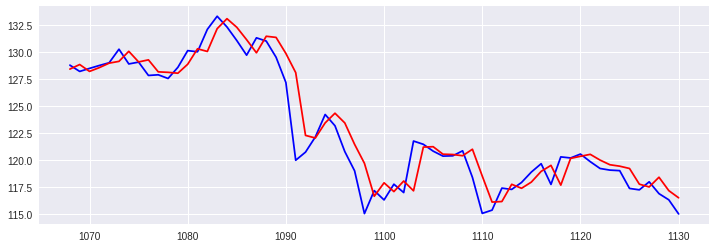

In [0]:
# RMSE on TEST
y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse) 

x2 = np.arange(1068, 1068 + len(y_test))

pyplot.figure(figsize=[12,4])
pyplot.plot(x2, y_test, 'b-', x2, y_pred, 'r-')
pyplot.show()

### simple model: next5day = today

In [0]:
print('RMSE on TRAIN: %.3f' % sqrt(mean_squared_error(df.close[1068:], df.close[1068-1:-1])))

RMSE on TRAIN: 1.716


# LSTM

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
df['d1'] = df.close.shift(1)
df.d1 = (df.close - df.d1) / df.d1

print('min-max:',df.d1.min(), df.d1.max() )

min-max: -0.11696777798472717 0.2960769520935496


In [0]:
# scale df.d1 -> (0,1)
df.d1 = (df.d1 + 1)/2

In [0]:
def fn_calc_RMSE(model):
  close_y = df.close[test_from:]

  y_pred =  model.predict([test_X])

  close_pred = []

  for i in np.arange(0,y_pred.shape[0]):
    # price of previous day
    close_t_1 = df.close[test_from - 1 + i]
    # back normalize
    percent = y_pred[i][0]*2 - 1
    # price predict
    close_t = (percent + 1)*close_t_1
    # append to result
    close_pred.append(close_t)
    
  print('RMSE on TRAIN: %.3f' % sqrt(mean_squared_error(close_y, close_pred)))

### generate LSTM dataset

In [0]:
train_X = []
train_y = []

test_X = []
test_y = []

len_lstm_spl = 10
test_from = 1068 # 2016-10-03

# TRAIN - each sample
for i in np.arange(len_lstm_spl + 1,test_from):
  # y
  train_y.append(df.d1[i])
  
  # X
  x = []
  for j in np.arange(len_lstm_spl,0,-1):
    x.append(df.d1[i-j])
  
  train_X.append([x])


# TEST - each sample
for i in np.arange(test_from, df.shape[0]):
  # y
  test_y.append(df.d1[i])
  
  # X
  x = []
  for j in np.arange(len_lstm_spl,0,-1):
    x.append(df.d1[i-j])
  
  test_X.append([x])
  

In [0]:
# use information from 10 days before
n_node = 5
look_back = 10

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(n_node, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_X], train_y, epochs=1000, batch_size=10, verbose=2)

Epoch 1/1000
 - 2s - loss: 0.1643
Epoch 2/1000
 - 0s - loss: 0.0027
Epoch 3/1000
 - 0s - loss: 1.8119e-04
Epoch 4/1000
 - 0s - loss: 1.8104e-04
Epoch 5/1000
 - 0s - loss: 1.8145e-04
Epoch 6/1000
 - 0s - loss: 1.8182e-04
Epoch 7/1000
 - 0s - loss: 1.8259e-04
Epoch 8/1000
 - 0s - loss: 1.8083e-04
Epoch 9/1000
 - 0s - loss: 1.8248e-04
Epoch 10/1000
 - 0s - loss: 1.8159e-04
Epoch 11/1000
 - 0s - loss: 1.8180e-04
Epoch 12/1000
 - 0s - loss: 1.8273e-04
Epoch 13/1000
 - 0s - loss: 1.8248e-04
Epoch 14/1000
 - 0s - loss: 1.8112e-04
Epoch 15/1000
 - 0s - loss: 1.8183e-04
Epoch 16/1000
 - 0s - loss: 1.8127e-04
Epoch 17/1000
 - 0s - loss: 1.8135e-04
Epoch 18/1000
 - 0s - loss: 1.8107e-04
Epoch 19/1000
 - 0s - loss: 1.8151e-04
Epoch 20/1000
 - 0s - loss: 1.8137e-04
Epoch 21/1000
 - 0s - loss: 1.8164e-04
Epoch 22/1000
 - 0s - loss: 1.8071e-04
Epoch 23/1000
 - 0s - loss: 1.8053e-04
Epoch 24/1000
 - 0s - loss: 1.8255e-04
Epoch 25/1000
 - 0s - loss: 1.8191e-04
Epoch 26/1000
 - 0s - loss: 1.8125e-04
Epo

In [0]:
close_y = df.close[test_from:]

y_pred =  model.predict([test_X])

close_pred = []

for i in np.arange(0,y_pred.shape[0]):
  # price of previous day
  close_t_1 = df.close[test_from - 1 + i]
  # back normalize
  percent = y_pred[i][0]*2 - 1
  # price predict
  close_t = (percent + 1)*close_t_1
  # append to result
  close_pred.append(close_t)

### LSTM 1 node, 100 epoch, look_back 10 results: 1.739

In [0]:
print('RMSE on TRAIN: %.3f' % sqrt(mean_squared_error(close_y, close_pred)))

RMSE on TRAIN: 1.739


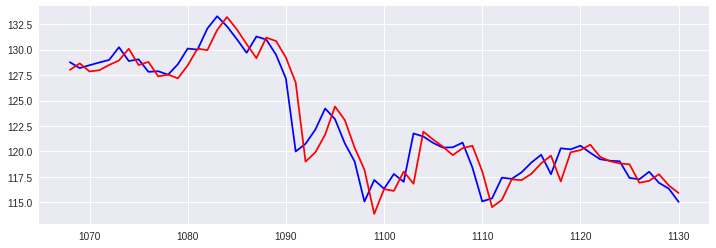

In [0]:
x2 = np.arange(test_from, test_from + len(close_y))

pyplot.figure(figsize=[12,4])
pyplot.plot(x2, close_y, 'b-', x2, close_pred, 'r-')
pyplot.show()

### LSTM 5 node, 1000 epoch, look_back 10 results: 1.804

In [0]:
print('RMSE on TRAIN: %.3f' % sqrt(mean_squared_error(close_y, close_pred)))

RMSE on TRAIN: 1.804


### Predict base on prev difference: 1.716

In [0]:
close_y = df.close[test_from:]
close_pred = df.close[test_from-1:-1]

In [0]:
print('RMSE on TRAIN: %.3f' % sqrt(mean_squared_error(close_y, close_pred)))

RMSE on TRAIN: 1.716


### LSTM use VOLUME information: 1.705

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))

df['vol'] = scaler.fit_transform(df[['volume']])

print('min-max:',df.vol.min(), df.vol.max() )

min-max: 0.0 1.0


In [0]:
# LSTM dataset

train_X = []
train_y = []

test_X = []
test_y = []

len_lstm_spl = 10
test_from = 1068 # 2016-10-03

# TRAIN - each sample
for i in np.arange(len_lstm_spl + 1,test_from):
  # y
  train_y.append(df.d1[i])
  
  # X
  x = []
  for j in np.arange(len_lstm_spl,0,-1):
#     x.append([df.d1[i-j]])
    x.append([df.d1[i-j], df.vol[i-j]])
  
  train_X.append(x)


# TEST - each sample
for i in np.arange(test_from, df.shape[0]):
  # y
  test_y.append(df.d1[i])
  
  # X
  x = []
  for j in np.arange(len_lstm_spl,0,-1):
#     x.append([df.d1[i-j]])
    x.append([df.d1[i-j], df.vol[i-j]])
  
  test_X.append(x)
  

In [0]:
# create and fit the LSTM network
model = Sequential()

model.add(LSTM(10, dropout=0.5, recurrent_dropout=0.5, input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_X], train_y, epochs=200, batch_size=10, verbose=2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, dropout=0.5, recurrent_dropout=0.5, input_shape=(None, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/200
 - 2s - loss: 2.0023e-04
Epoch 2/200
 - 1s - loss: 1.6992e-04
Epoch 3/200
 - 1s - loss: 1.6522e-04
Epoch 4/200
 - 1s - loss: 1.6248e-04
Epoch 5/200
 - 1s - loss: 1.6248e-04
Epoch 6/200
 - 1s - loss: 1.6323e-04
Epoch 7/200
 - 1s - loss: 1.6132e-04
Epoch 8/200
 - 1s - loss: 1.6116e-04
Epoch 9/200
 - 1s - loss: 1.6517e-04
Epoch 10/200
 - 1s - loss: 1.5948e-04
Epoch 11/200
 - 1s - loss: 1.6384e-04
Epoch 12/200
 - 1s - loss: 1.6216e-04
Epoch 13/200
 - 1s - loss: 1.6066e-04
Epoch 14/200
 - 1s - loss: 1.6190e-04
Epoch 15/200
 - 1s - loss: 1.5984e-04
Epoch 16/200
 - 1s - loss: 1.5999e-04
Epoch 17/200
 - 1s - loss: 1.5866e-04
Epoch 18/200
 - 1s - loss: 1.5857e-04
Epoch 19/200
 - 1s - loss: 1.6194e-04
Epoch 20/200
 - 1s - loss: 1.6092e-04
Epoch 21/200
 - 1s - loss: 1.6145e-04
Epoch 22/200
 - 1s - loss: 1.6067e-04
Epoch 23/200
 - 1s - loss: 1.5968e-04
Epoch 24/200
 - 1s - loss: 1.5772e-04
Epoch 25/200
 - 1s - loss: 1.5904e-04
Epoch 26/200
 - 1s - loss: 1.6061e-04
Epoch 27/200
 - 1s - 

In [0]:
fn_calc_RMSE(model)

RMSE on TRAIN: 1.706


### LSTM use VOLUME + DATE information: 1.756

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))

df['vol'] = scaler.fit_transform(df[['volume']])

print('min-max:',df.vol.min(), df.vol.max() )

min-max: 0.0 1.0


In [0]:
# month
# dofw
# dofm
# dofy
df['month'] = pd.to_datetime(df.time, format='%Y-%m-%d').dt.month / 12
df['dofy'] = pd.to_datetime(df.time, format='%Y-%m-%d').dt.dayofyear / 366
df['dofm'] = pd.to_datetime(df.time, format='%Y-%m-%d').dt.day / 31
df['dofw'] = (pd.to_datetime(df.time, format='%Y-%m-%d').dt.dayofweek + 1) / 5

In [0]:
# LSTM dataset

train_X = []
train_y = []

test_X = []
test_y = []

len_lstm_spl = 10
test_from = 1068 # 2016-10-03

# TRAIN - each sample
for i in np.arange(len_lstm_spl + 1,test_from):
  # y
  train_y.append(df.d1[i])
  
  # X
  x = []
  for j in np.arange(len_lstm_spl,0,-1):
    x.append([df.d1[i-j], df.vol[i-j], df.month[i-j], df.dofy[i-j], df.dofm[i-j], df.dofw[i-j]])
  
  train_X.append(x)


# TEST - each sample
for i in np.arange(test_from, df.shape[0]):
  # y
  test_y.append(df.d1[i])
  
  # X
  x = []
  for j in np.arange(len_lstm_spl,0,-1):
    x.append([df.d1[i-j], df.vol[i-j], df.month[i-j], df.dofy[i-j], df.dofm[i-j], df.dofw[i-j]])
  
  test_X.append(x)
  

In [0]:
# create and fit the LSTM network
model = Sequential()

model.add(LSTM(10, dropout=0.5, recurrent_dropout=0.5, input_dim=6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_X], train_y, epochs=200, batch_size=10, verbose=2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, dropout=0.5, recurrent_dropout=0.5, input_shape=(None, 6))`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/200
 - 3s - loss: 0.0025
Epoch 2/200
 - 1s - loss: 5.3740e-04
Epoch 3/200
 - 1s - loss: 3.4762e-04
Epoch 4/200
 - 1s - loss: 3.1251e-04
Epoch 5/200
 - 1s - loss: 2.4867e-04
Epoch 6/200
 - 1s - loss: 2.3960e-04
Epoch 7/200
 - 1s - loss: 2.2252e-04
Epoch 8/200
 - 1s - loss: 2.1812e-04
Epoch 9/200
 - 1s - loss: 1.9730e-04
Epoch 10/200
 - 1s - loss: 1.8663e-04
Epoch 11/200
 - 1s - loss: 1.8920e-04
Epoch 12/200
 - 1s - loss: 1.7874e-04
Epoch 13/200
 - 1s - loss: 1.7471e-04
Epoch 14/200
 - 1s - loss: 1.8135e-04
Epoch 15/200
 - 1s - loss: 1.7629e-04
Epoch 16/200
 - 1s - loss: 1.7452e-04
Epoch 17/200
 - 1s - loss: 1.7326e-04
Epoch 18/200
 - 1s - loss: 1.7405e-04
Epoch 19/200
 - 1s - loss: 1.7717e-04
Epoch 20/200
 - 1s - loss: 1.7495e-04
Epoch 21/200
 - 1s - loss: 1.6960e-04
Epoch 22/200
 - 1s - loss: 1.7062e-04
Epoch 23/200
 - 1s - loss: 1.6868e-04
Epoch 24/200
 - 1s - loss: 1.6700e-04
Epoch 25/200
 - 1s - loss: 1.6420e-04
Epoch 26/200
 - 1s - loss: 1.6611e-04
Epoch 27/200
 - 1s - loss

In [0]:
fn_calc_RMSE(model)

RMSE on TRAIN: 1.756


# KẾT LUẬN:


---


- Nếu chỉ sử dụng PRICE để predict, các MODEL (ARIMA, SVM, LSTM) đều cho kết quả dự đoán khá tương đồng và RMSE ~ simple predict (price = price of previous day)
- Volume đóng góp đáng kể vào kết quả dự đoán
- Date information: Không đóng góp vào kết quả dự đoán